In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import transformers

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import matplotlib

In [3]:
train_df = pd.read_csv('../data/train.csv')
valid_df = pd.read_csv('../data/dev.csv')
test_df = pd.read_csv('../data/test.csv')

In [4]:
train_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [5]:
valid_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,0.0


In [6]:
test_df.head()

,id,source,sentence_1,sentence_2
0,boostcamp-sts-v1-test-000,petition-sampled,가상화폐거래소 폐쇄하지 말고,가상화폐 거래소 폐쇄 반대합니다
1,boostcamp-sts-v1-test-001,petition-sampled,뇌물적폐1호 640만달라 70억 뇌물받은 권양숙 구속하고 재산을 몰수하라,뇌물적폐 원조 640만달라 70억 뇌물받은 권양숙 구속하고 재산을 몰수하세요
2,boostcamp-sts-v1-test-002,petition-rtt,기무사 영관급의 하극상 정말 이대로 방관하는게 민주주의 인지요,그냥 가만히 있는게 진짜 민주주의인가요?
3,boostcamp-sts-v1-test-003,nsmc-sampled,화까지가 한계였다.,기대가 너무 컸다...
4,boostcamp-sts-v1-test-004,slack-rtt,왜 혼자 있지.. ㅠㅠ,왜 혼자야.. ㅠㅠ


In [7]:
print('train data')
print('데이터 개수: ', len(train_df))
print('X_Null 개수: ', len(train_df[train_df['sentence_1'].isnull() | train_df['sentence_2'].isnull()]))
print('y_Null 개수: ', len(train_df[train_df['label'].isnull()]))
print('\n')
print('validation data')
print('데이터 개수: ', len(valid_df))
print('X_Null 개수: ', len(valid_df[valid_df['sentence_1'].isnull() | valid_df['sentence_2'].isnull()]))
print('y_Null 개수: ', len(valid_df[valid_df['label'].isnull()]))
print('\n')
print('test data')
print('데이터 개수: ', len(test_df))
print('X_Null 개수: ', len(test_df[test_df['sentence_1'].isnull() | test_df['sentence_2'].isnull()]))

train data
데이터 개수:  9324
X_Null 개수:  0
y_Null 개수:  0


validation data
데이터 개수:  550
X_Null 개수:  0
y_Null 개수:  0


test data
데이터 개수:  1100
X_Null 개수:  0


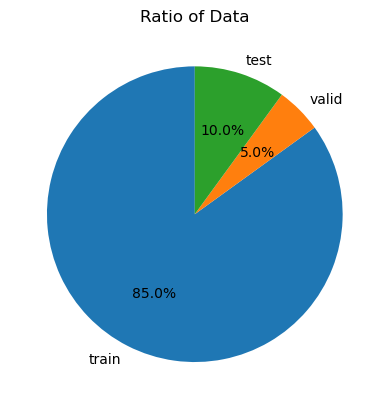

In [8]:
# 비율 데이터
ratios = [len(train_df), len(valid_df), len(test_df)]
labels = ['train', 'valid', 'test']

# 누적 막대 그래프 그리기
plt.pie(ratios, labels=labels, autopct='%1.1f%%', startangle=90)

# 그래프 제목 추가
plt.title('Ratio of Data')

# 그래프 표시
plt.show()

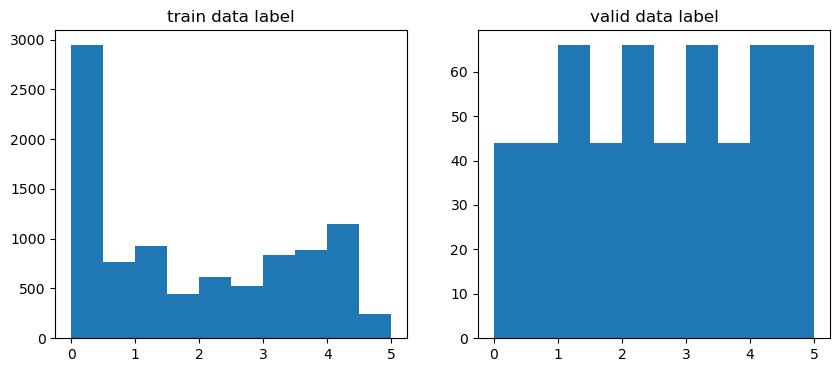

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(train_df['label'], bins = 10)
axes[0].set_title('train data label')


axes[1].hist(valid_df['label'], bins = 10)
axes[1].set_title('valid data label')

plt.show()

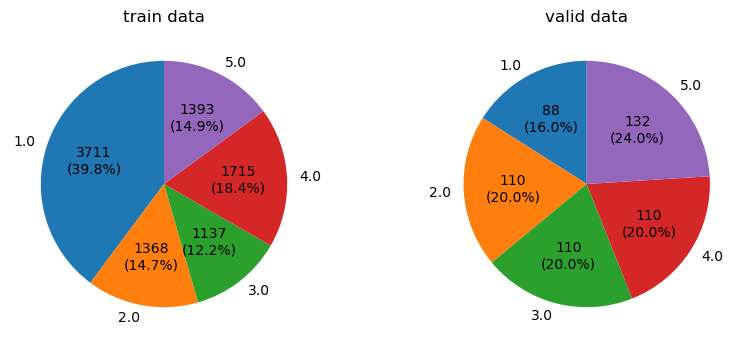

In [10]:
import numpy as np
def ratio_of_data(df, bin_size):
    ratios = []
    labels = []
    hist, bin_edges = np.histogram(df['label'], bins=bin_size) # 구간 수 = bins
    for i in range(len(hist)):
        ratios.append(hist[i])
        labels.append(bin_edges[i+1])
    return ratios, labels

train_ratio, train_labels = ratio_of_data(train_df, 5)
valid_ratio, valid_labels = ratio_of_data(valid_df, 5)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].pie(train_ratio, labels=train_labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(train_ratio) / 100, p), startangle=90)
axes[0].set_title('train data')

axes[1].pie(valid_ratio, labels=valid_labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(valid_ratio) / 100, p), startangle=90)
axes[1].set_title('valid data')

# 그래프 표시
plt.show()

In [11]:
df_X = train_df[['sentence_1', 'sentence_2']]
df_y = train_df[['label']]

In [28]:
tokenizer = transformers.ElectraTokenizer.from_pretrained('monologg/koelectra-base-v3-discriminator')

total_tokenize = []
total_sentence = []
len_sentence1 = []
len_sentence2 = []
len_sentence = []
for i, j in zip(df_X['sentence_1'], df_X['sentence_2']):
    add_token = '[SEP]'.join([i, j])
    total_sentence.append(add_token)

    tokenize_sentence1 = tokenizer.tokenize(i)
    len_sentence1.append(len(tokenize_sentence1))

    tokenize_sentence2 = tokenizer.tokenize(j)
    len_sentence2.append(len(tokenize_sentence2))

    tokenize_sentence = tokenizer.tokenize(add_token)
    total_tokenize.append(tokenize_sentence)
    len_sentence.append(len(tokenize_sentence))

In [29]:
print('전체 문장: ', total_sentence[0])
print('토큰화한 문장: ', total_tokenize[0])
print('sen1 + sen2 길이: ', len_sentence)
print('sen1 길이: ', len_sentence1)
print('sen2 길이: ', len_sentence2)

전체 문장:  스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~[SEP]반전도 있고,사랑도 있고재미도있네요.
토큰화한 문장:  ['스릴', '##도', '##있', '##고', '반전', '##도', '있', '##고', '여느', '한국', '##영화', '쓰레기', '##들', '##하', '##고', '##는', '차원', '##이', '다르', '##네', '##요', '~', '[SEP]', '반전', '##도', '있', '##고', ',', '사랑', '##도', '있', '##고', '##재', '##미', '##도', '##있', '##네', '##요', '.']
sen1 + sen2 길이:  [39, 23, 21, 27, 22, 11, 22, 21, 22, 21, 19, 20, 39, 29, 33, 19, 37, 17, 18, 23, 25, 23, 27, 35, 82, 90, 13, 89, 34, 20, 33, 13, 22, 14, 86, 16, 25, 11, 29, 18, 18, 14, 19, 27, 34, 14, 25, 47, 21, 26, 25, 23, 41, 26, 35, 22, 18, 12, 16, 12, 41, 27, 16, 52, 62, 47, 13, 20, 23, 25, 35, 18, 32, 17, 16, 17, 31, 39, 43, 18, 15, 34, 25, 14, 12, 55, 13, 36, 15, 42, 35, 15, 13, 19, 23, 22, 33, 16, 29, 13, 17, 28, 24, 18, 20, 19, 50, 31, 25, 31, 42, 28, 44, 66, 20, 18, 49, 24, 31, 17, 19, 30, 32, 13, 14, 30, 27, 19, 28, 35, 24, 19, 41, 53, 17, 13, 88, 15, 26, 20, 18, 23, 22, 37, 20, 73, 15, 64, 15, 15, 12, 20, 19, 14, 20, 21, 41, 14, 35, 32, 18,

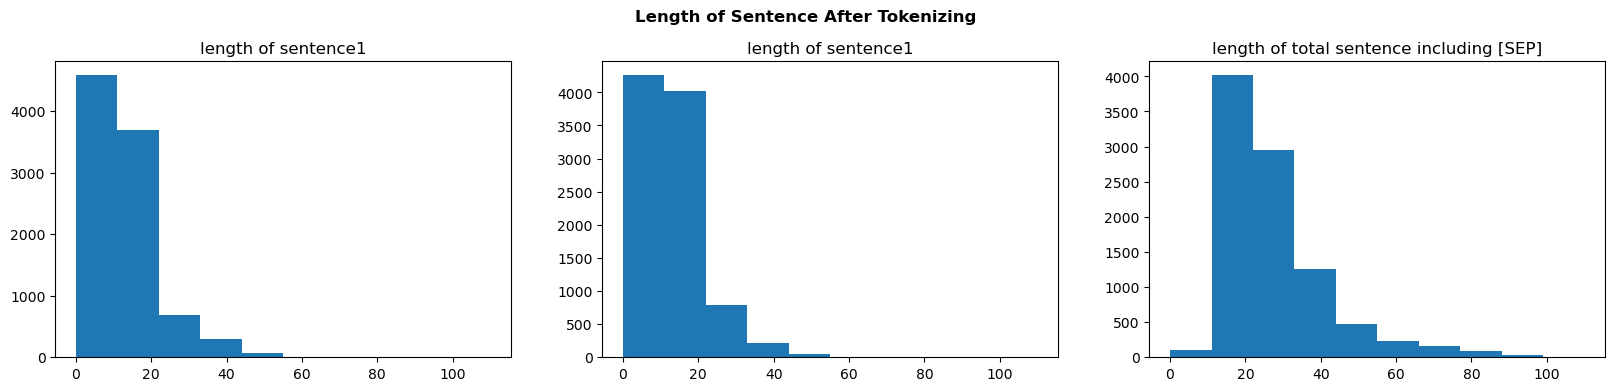

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

axes[0].hist(len_sentence1, bins = 10, range = (0, 110))
axes[0].set_title('length of sentence1')

axes[1].hist(len_sentence2, bins = 10, range = (0, 110))
axes[1].set_title('length of sentence1')

axes[2].hist(len_sentence, bins = 10, range = (0, 110))
axes[2].set_title('length of total sentence including [SEP]')

plt.suptitle('Length of Sentence After Tokenizing', fontweight='bold')
plt.subplots_adjust(top=0.85)
plt.show()

In [23]:
tokenizer = transformers.ElectraTokenizer.from_pretrained('monologg/koelectra-base-v3-discriminator')
tokenize_sentence1 = tokenizer.tokenize(df_X['sentence_1'][0])
tokenize_sentence2 = tokenizer.tokenize(df_X['sentence_2'][0])

print(tokenize_sentence1)
print(len(tokenize_sentence1))
print(tokenize_sentence2)
print(len(tokenize_sentence2))

add_token = '[SEP]'.join([df_X['sentence_1'][0], df_X['sentence_2'][0]])
tokenize_sentence = tokenizer.tokenize(add_token)
print(tokenize_sentence)
print(len(tokenize_sentence))


['스릴', '##도', '##있', '##고', '반전', '##도', '있', '##고', '여느', '한국', '##영화', '쓰레기', '##들', '##하', '##고', '##는', '차원', '##이', '다르', '##네', '##요', '~']
22
['반전', '##도', '있', '##고', ',', '사랑', '##도', '있', '##고', '##재', '##미', '##도', '##있', '##네', '##요', '.']
16
['스릴', '##도', '##있', '##고', '반전', '##도', '있', '##고', '여느', '한국', '##영화', '쓰레기', '##들', '##하', '##고', '##는', '차원', '##이', '다르', '##네', '##요', '~', '[SEP]', '반전', '##도', '있', '##고', ',', '사랑', '##도', '있', '##고', '##재', '##미', '##도', '##있', '##네', '##요', '.']
39
